In [1]:
# Importing necessary libraries
# Supress Warnings

import warnings

warnings.filterwarnings('ignore')


import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
df = pd.read_csv(r'/Users/ansumanpatnaik0ap/Downloads/Lead Scoring Assignment/Leads.csv')

In [3]:
#Using df.head() to read first 5 records

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df.shape

(9240, 37)

In [5]:
#The dataset is having 9240 rows and 37 columns. Let us now view the info of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
#Out of the 37 columns, 7 columns are having numerical variables and rest 30 columns are having categorical variables. Let us now use the describe function to view the details of the data

df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Converting all the values to lower case
# Cleaning the data

df = df.applymap(lambda s:s.lower() if type(s) == str else s)

In [8]:
# Replacing 'Select' with NaN (Since it means no option is selected)

df = df.replace('select',np.nan)

In [9]:
# Checking if there are columns with one unique value

df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [10]:
# Dropping unique valued columns

df1= df.drop(['Magazine','Receive More Updates About Our Courses','Get updates on DM Content','Update me on Supply Chain Content','I agree to pay the amount through cheque'],axis=1)

In [11]:
#rechecking the missing values 

df1.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums          

In [12]:
# Checking the percentage of missing values

round(100*(df1.isnull().sum()/len(df1.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [13]:
#Let us remove the columns which are having more than 30% of null values i.e., the columns which are having more than 3000 values as null values 

for col in df1.columns:

    if df1[col].isnull().sum() > 3500:
    
        df1.drop(col, 1, inplace=True)

In [14]:
df1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,...,better career prospects,no,no,no,no,no,no,interested in other courses,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,...,better career prospects,no,no,no,no,no,no,ringing,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,...,better career prospects,no,no,no,no,no,no,will revert after reading the email,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,...,better career prospects,no,no,no,no,no,no,ringing,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,...,better career prospects,no,no,no,no,no,no,will revert after reading the email,no,modified


In [15]:
#Delete the Lead Number and Tags columns as it is not usable

df2 = df1.drop(['Lead Number', 'Tags'], axis = 1)

df2.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,api,organic search,no,no,0,5.0,674,2.5,email opened,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [16]:
#rechecking with the percentage of missing values

round(100*(df2.isnull().sum()/len(df2.index)),2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [17]:
#We can see there are still 

df2['Specialization'] = df2['Specialization'].fillna('NA') 

df2['What matters most to you in choosing a course'] = df2['What matters most to you in choosing a course'].fillna('NA')

df2['Country'] = df2['Country'].fillna('NA')

df2['What is your current occupation'] = df2['What is your current occupation'].fillna('NA')

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [18]:
#rechecking with the percentage of missing values

round(100*(df2.isnull().sum()/len(df2.index)),2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [19]:
df2["Country"].value_counts()

india                   6492
NA                      2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switzerland   

In [20]:
def slots(value):
    
    category = ""
    
    if value == "india":
    
        category = "India"
    
    elif value == "NA":
    
        category = "NA"
    
    else:
    
        category = "Outside India"
    
    return category



df2['Country'] = df2.apply(lambda x:slots(x['Country']), axis = 1)

df2['Country'].value_counts()

India            6492
NA               2461
Outside India     287
Name: Country, dtype: int64

In [21]:
df3 = df2[df2.isnull().sum(axis=1) <1]

In [22]:
#rechecking with the percentage of missing values

round(100*(df3.isnull().sum()/len(df3.index)),2)

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [23]:
df3.shape

(9074, 22)

In [24]:
#We can also remove the prospect Id column as it is no more required for our analysis

df4 = df3.drop('Prospect ID',1)

df4.shape

(9074, 21)

In [25]:
df4.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
max,1.000000,251.000000,2272.000000,55.000000


In [26]:
df4.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,NA,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,api,organic search,no,no,0,5.0,674,2.5,email opened,India,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,India,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,India,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,India,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


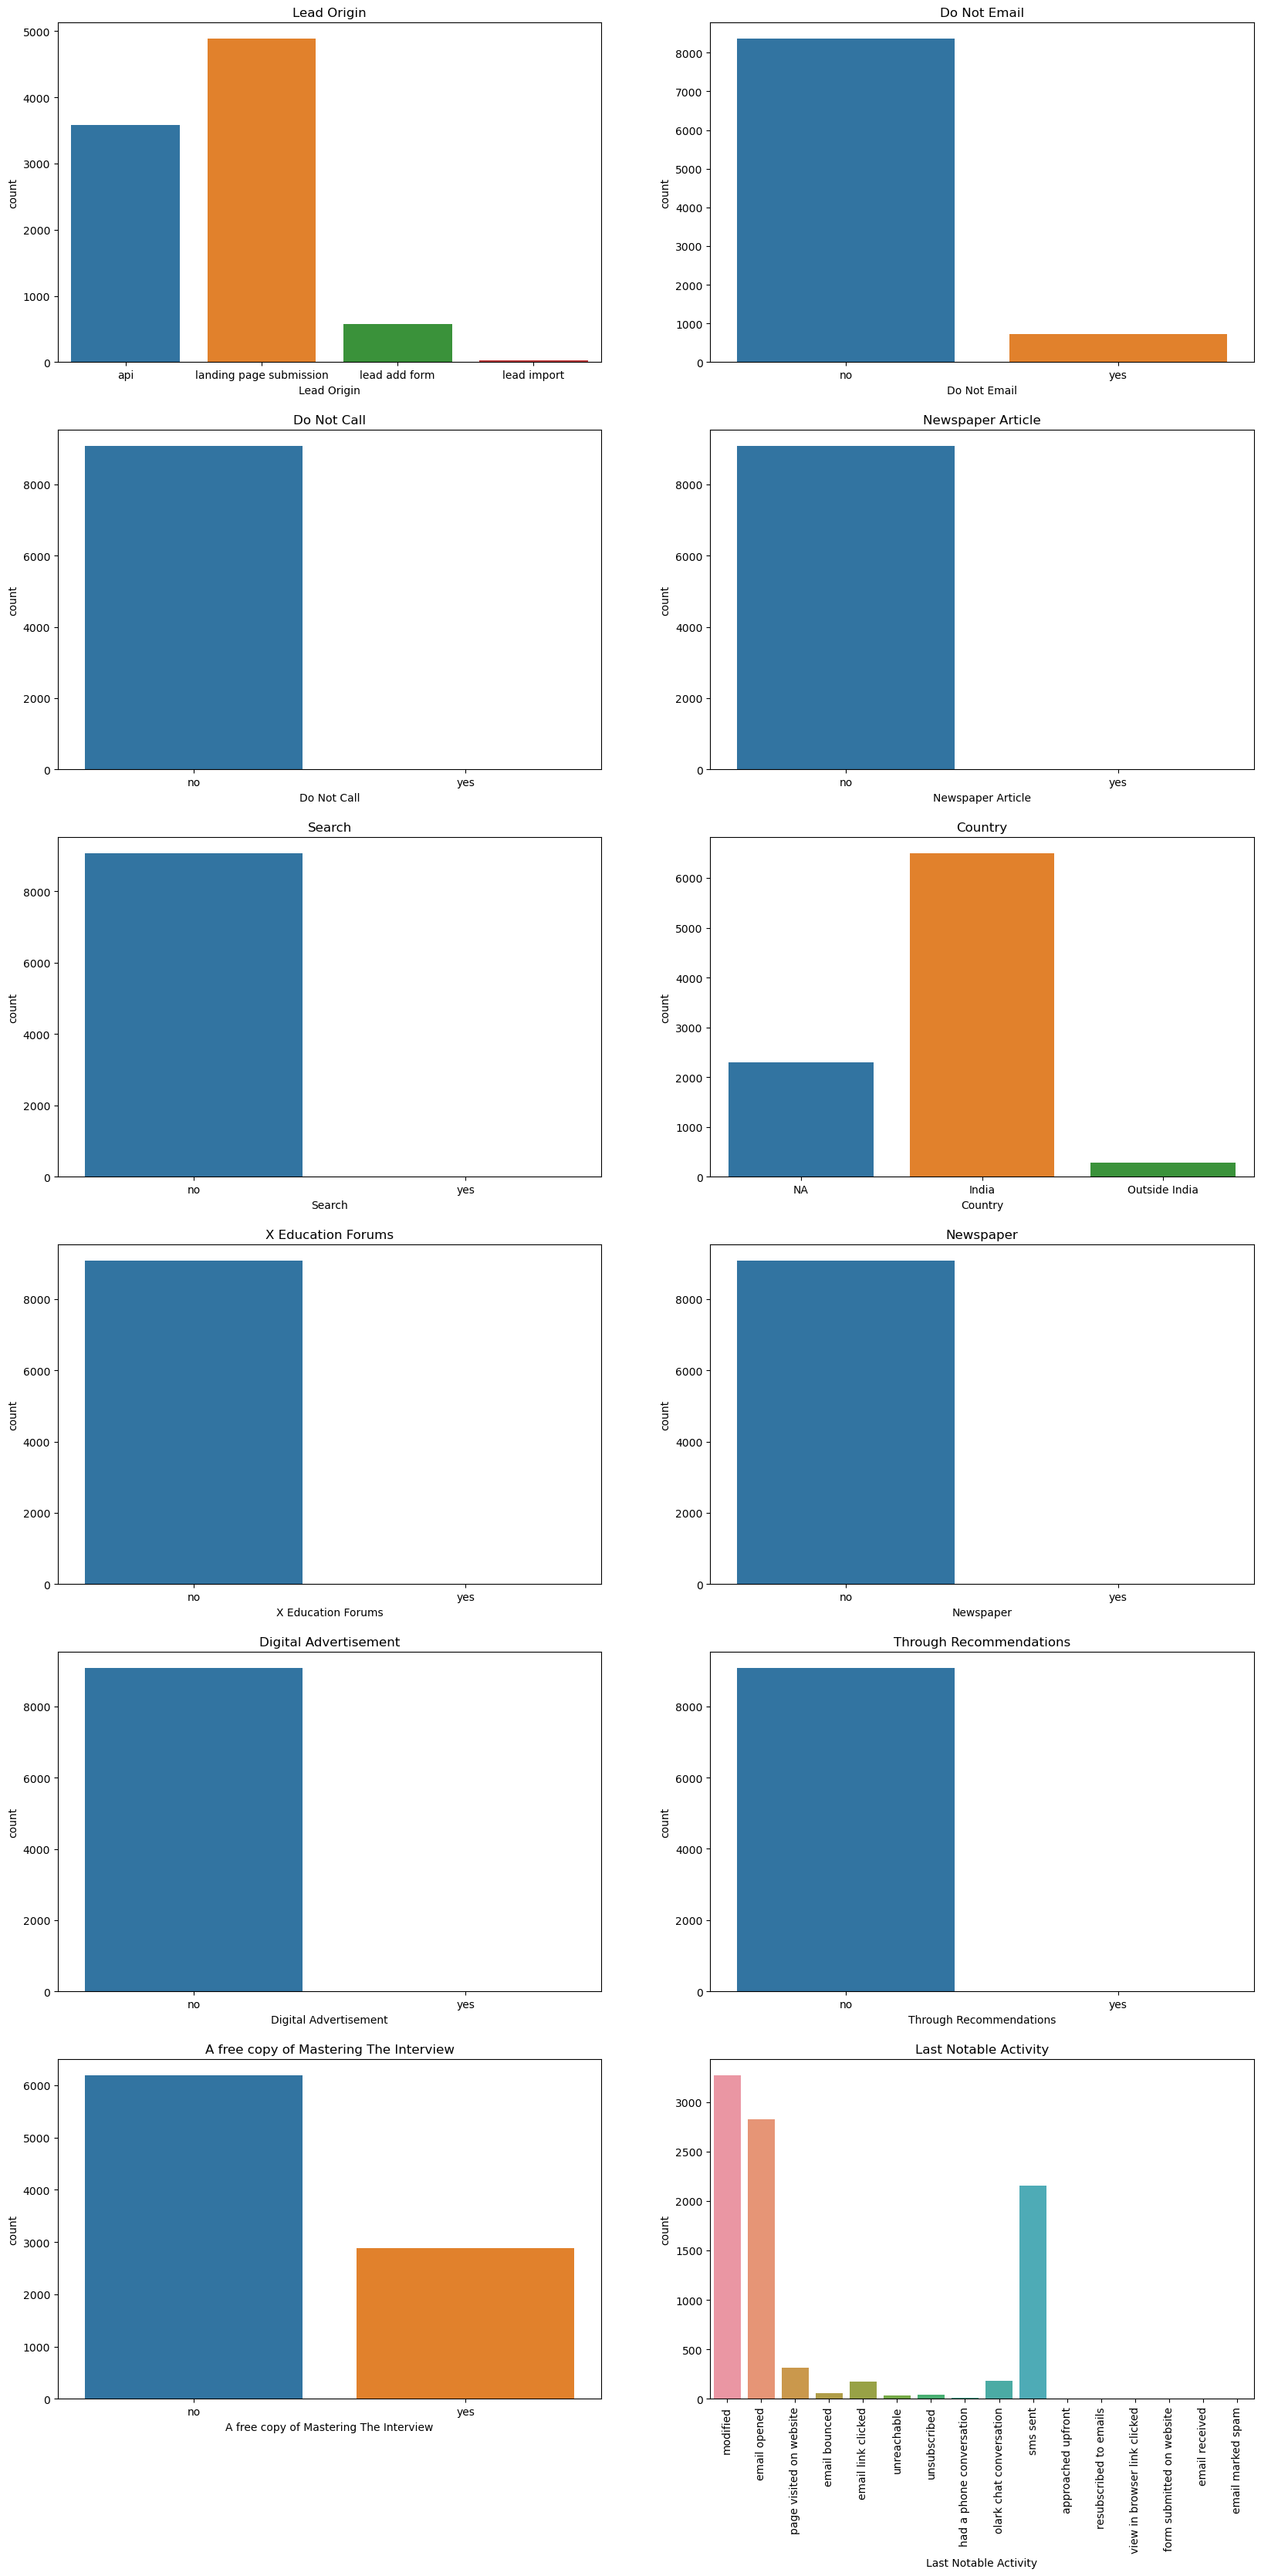

In [27]:
#DATA ANALYSIS

#Plotting the categorical variables in bar chart

plt.figure(figsize = (20,40))


plt.subplot(6,2,1)

sns.countplot(df4['Lead Origin'])

plt.title('Lead Origin')



plt.subplot(6,2,2)

sns.countplot(df4['Do Not Email'])

plt.title('Do Not Email')



plt.subplot(6,2,3)

sns.countplot(df4['Do Not Call'])

plt.title('Do Not Call')



plt.subplot(6,2,4)

sns.countplot(df4['Newspaper Article'])

plt.title('Newspaper Article')



plt.subplot(6,2,5)

sns.countplot(df4['Search'])

plt.title('Search')



plt.subplot(6,2,6)

sns.countplot(df4['Country'])

plt.title('Country')



plt.subplot(6,2,7)

sns.countplot(df4['X Education Forums'])

plt.title('X Education Forums')



plt.subplot(6,2,8)

sns.countplot(df4['Newspaper'])

plt.title('Newspaper')



plt.subplot(6,2,9)

sns.countplot(df4['Digital Advertisement'])

plt.title('Digital Advertisement')



plt.subplot(6,2,10)

sns.countplot(df4['Through Recommendations'])

plt.title('Through Recommendations')



plt.subplot(6,2,11)

sns.countplot(df4['A free copy of Mastering The Interview'])

plt.title('A free copy of Mastering The Interview')



plt.subplot(6,2,12)

sns.countplot(df4['Last Notable Activity']).tick_params(axis='x', rotation = 90)

plt.title('Last Notable Activity')



plt.show()

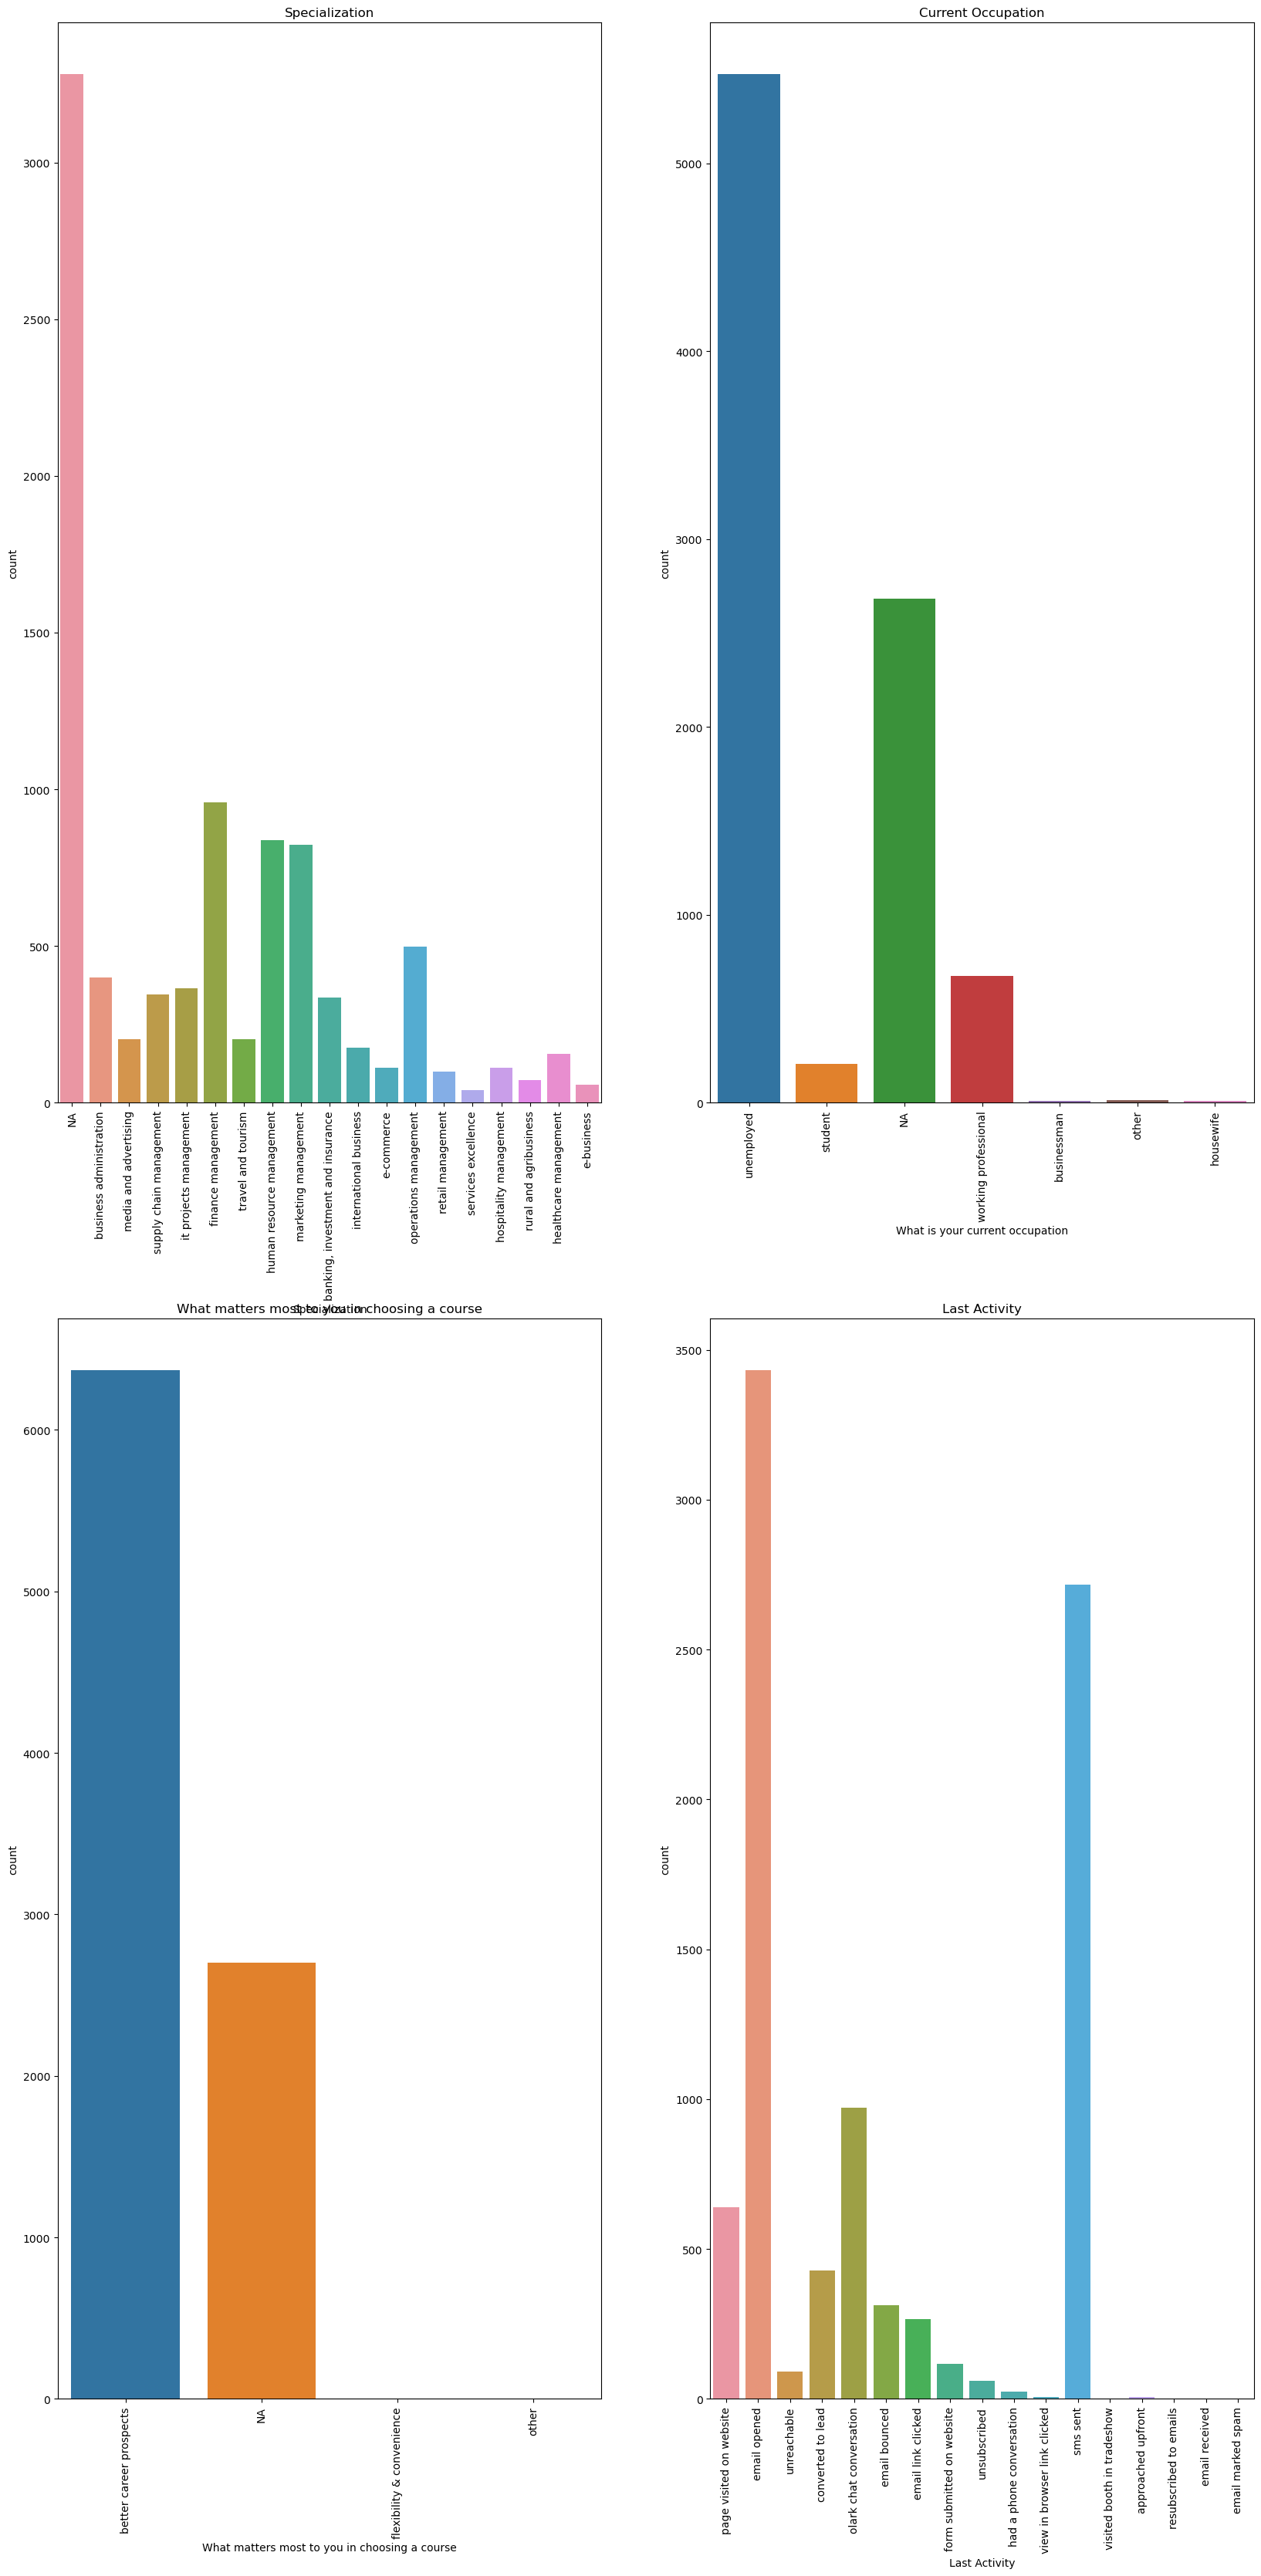

In [28]:
plt.figure(figsize = (20,40))


plt.subplot(2,2,1)

sns.countplot(df4['Specialization']).tick_params(axis='x', rotation = 90)

plt.title('Specialization')



plt.subplot(2,2,2)

sns.countplot(df4['What is your current occupation']).tick_params(axis='x', rotation = 90)

plt.title('Current Occupation')



plt.subplot(2,2,3)

sns.countplot(df4['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)

plt.title('What matters most to you in choosing a course')



plt.subplot(2,2,4)

sns.countplot(df4['Last Activity']).tick_params(axis='x', rotation = 90)

plt.title('Last Activity')



plt.show()

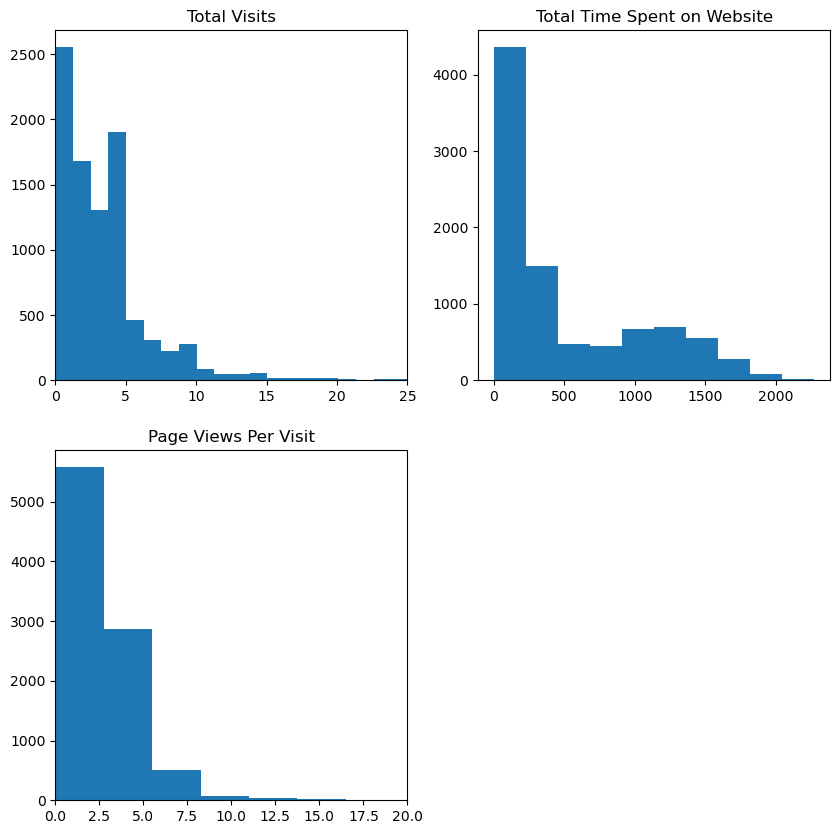

In [29]:
#Plotting the numerical varibales in bar chart

plt.figure(figsize = (10,10))

plt.subplot(221)

plt.hist(df4['TotalVisits'], bins = 200)

plt.title('Total Visits')

plt.xlim(0,25)



plt.subplot(222)

plt.hist(df4['Total Time Spent on Website'], bins = 10)

plt.title('Total Time Spent on Website')



plt.subplot(223)

plt.hist(df4['Page Views Per Visit'], bins = 20)

plt.title('Page Views Per Visit')

plt.xlim(0,20)



plt.show()

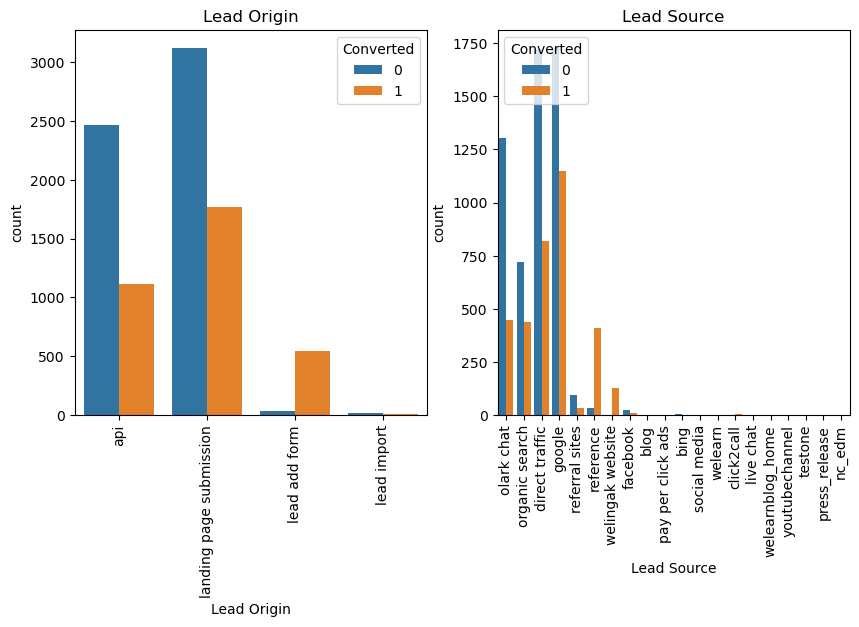

In [30]:
#Lead Origin and Lead Source

plt.figure(figsize = (10,5))



plt.subplot(1,2,1)

sns.countplot(x='Lead Origin', hue='Converted', data= df4).tick_params(axis='x', rotation = 90)

plt.title('Lead Origin')



plt.subplot(1,2,2)

sns.countplot(x='Lead Source', hue='Converted', data= df4).tick_params(axis='x', rotation = 90)

plt.title('Lead Source')


plt.show()

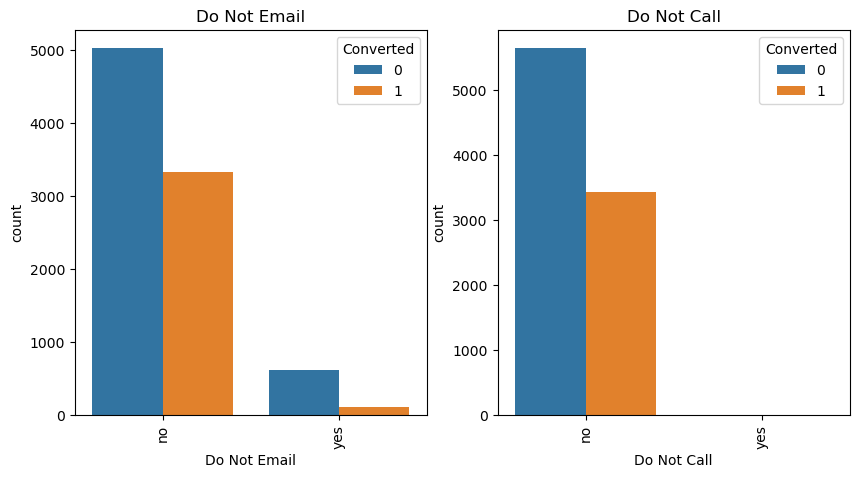

In [31]:
#Do not Email and Do not Call 

plt.figure(figsize = (10,5))


plt.subplot(1,2,1)

sns.countplot(x='Do Not Email', hue='Converted', data= df4).tick_params(axis='x', rotation = 90)

plt.title('Do Not Email')



plt.subplot(1,2,2)

sns.countplot(x='Do Not Call', hue='Converted', data= df4).tick_params(axis='x', rotation = 90)

plt.title('Do Not Call')


plt.show()

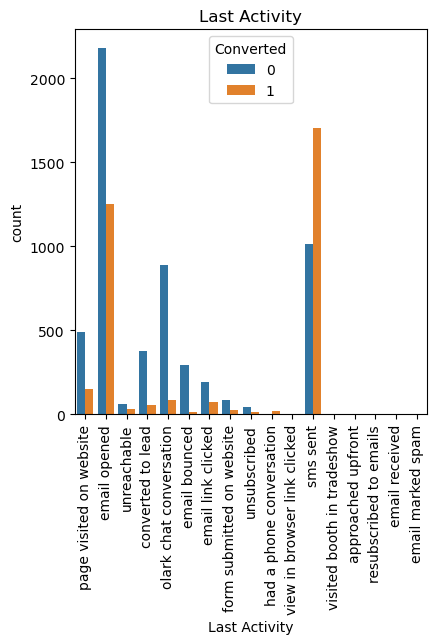

In [32]:
#Last Activity

plt.figure(figsize = (10,5))


plt.subplot(1,2,1)

sns.countplot(x='Last Activity', hue='Converted', data= df4).tick_params(axis='x', rotation = 90)

plt.title('Last Activity')


plt.show()

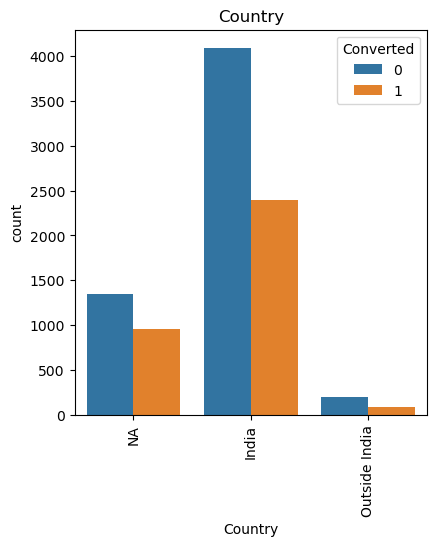

In [33]:
#Country

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)

sns.countplot(x='Country', hue='Converted', data= df4).tick_params(axis='x', rotation = 90)

plt.title('Country')


plt.show()

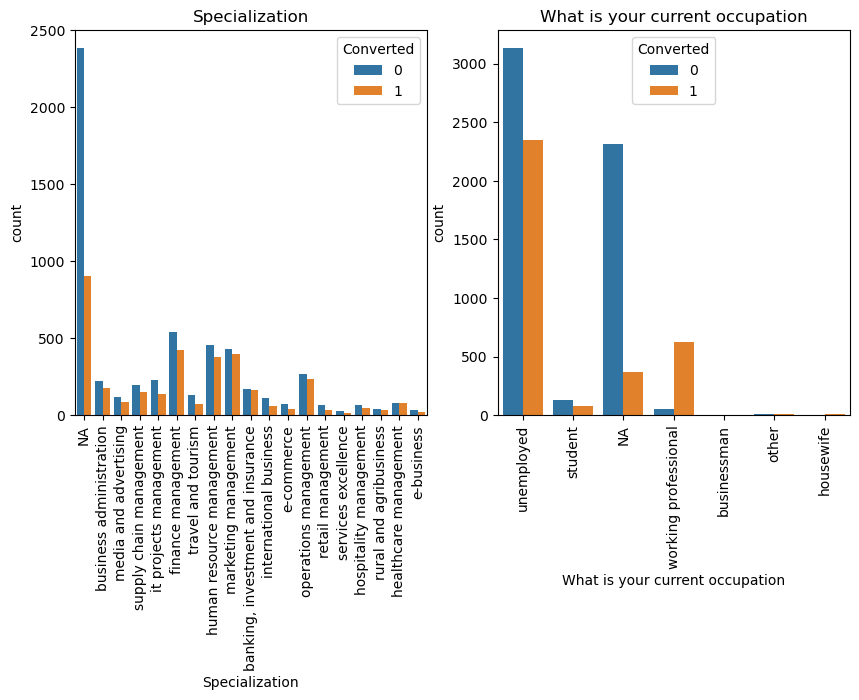

In [34]:
#Specialization and Occupatioin

plt.figure(figsize = (10,5))


plt.subplot(1,2,1)

sns.countplot(x='Specialization', hue='Converted', data= df4).tick_params(axis='x', rotation = 90)

plt.title('Specialization')


plt.subplot(1,2,2)

sns.countplot(x='What is your current occupation', hue='Converted', data= df4).tick_params(axis='x', rotation = 90)

plt.title('What is your current occupation')


plt.show()

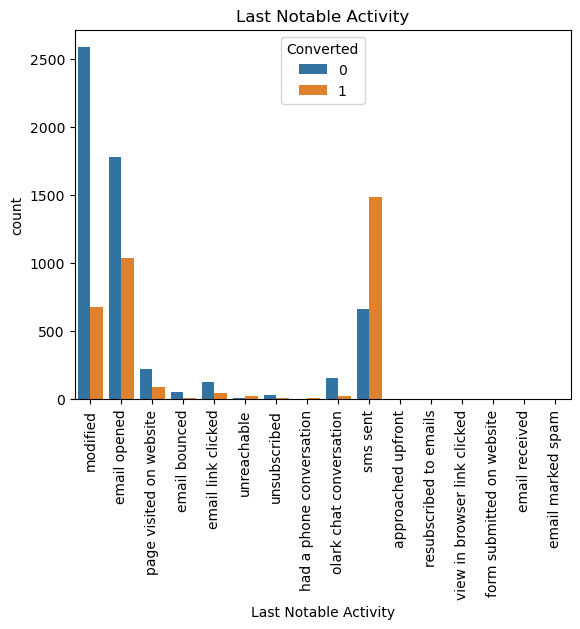

In [35]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= df4).tick_params(axis='x', rotation = 90)

plt.title('Last Notable Activity')


plt.show()

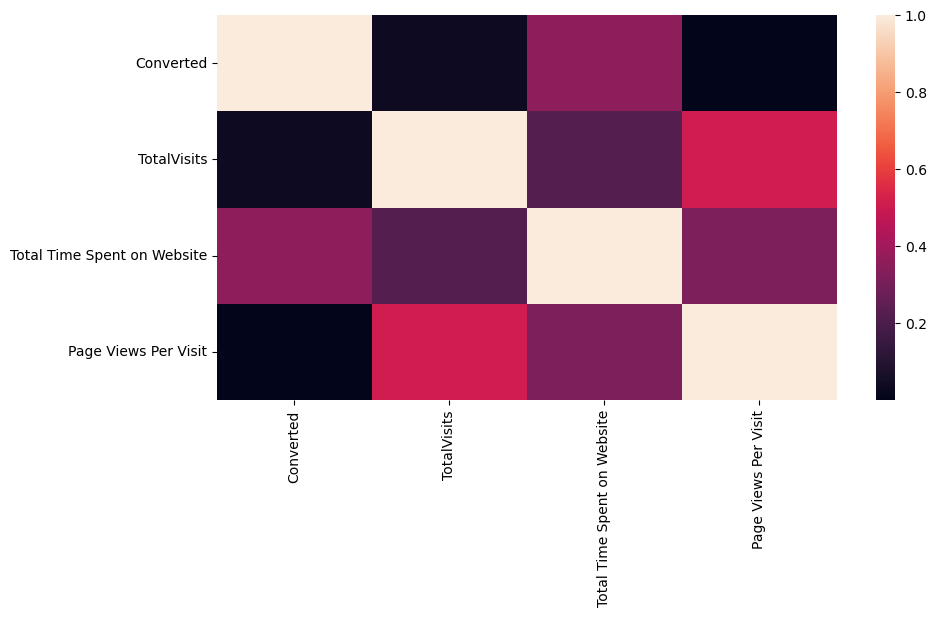

In [36]:
#correlation among varibles

plt.figure(figsize=(10,5))

sns.heatmap(df4.corr())


plt.show()

In [37]:
numerical_values = df4[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

numerical_values.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


In [38]:
# Create dummy variables using the 'get_dummies'

dummy = pd.get_dummies(df4[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)


# Add the results to the master dataframe

df4_dummy = pd.concat([df4, dummy], axis=1)

df4_dummy

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,no,0,0.0,0,0.00,page visited on website,NA,...,0,0,1,0,0,0,0,0,0,0
1,api,organic search,no,no,0,5.0,674,2.50,email opened,India,...,0,0,0,0,0,0,0,0,0,0
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,email opened,India,...,0,0,0,0,0,0,0,0,0,0
3,landing page submission,direct traffic,no,no,0,1.0,305,1.00,unreachable,India,...,0,0,1,0,0,0,0,0,0,0
4,landing page submission,google,no,no,1,2.0,1428,1.00,converted to lead,India,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,landing page submission,direct traffic,yes,no,1,8.0,1845,2.67,email marked spam,Outside India,...,0,0,0,0,0,0,0,0,0,0
9236,landing page submission,direct traffic,no,no,0,2.0,238,2.00,sms sent,India,...,0,0,0,0,0,0,1,0,0,0
9237,landing page submission,direct traffic,yes,no,0,2.0,199,2.00,sms sent,India,...,0,0,0,0,0,0,1,0,0,0
9238,landing page submission,google,no,no,1,3.0,499,3.00,sms sent,India,...,0,0,0,0,0,0,1,0,0,0


In [39]:
df4_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 100 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Origin                                           9074 non-null   object 
 1   Lead Source                                           9074 non-null   object 
 2   Do Not Email                                          9074 non-null   object 
 3   Do Not Call                                           9074 non-null   object 
 4   Converted                                             9074 non-null   int64  
 5   TotalVisits                                           9074 non-null   float64
 6   Total Time Spent on Website                           9074 non-null   int64  
 7   Page Views Per Visit                                  9074 non-null   float64
 8   Last Activity                                         907

In [40]:
df4_dummy = df4_dummy.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

df4_dummy

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-business,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [41]:
df4_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 83 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9074 non-null   int64  
 1   TotalVisits                                           9074 non-null   float64
 2   Total Time Spent on Website                           9074 non-null   int64  
 3   Page Views Per Visit                                  9074 non-null   float64
 4   Lead Origin_landing page submission                   9074 non-null   uint8  
 5   Lead Origin_lead add form                             9074 non-null   uint8  
 6   Lead Origin_lead import                               9074 non-null   uint8  
 7   Specialization_banking, investment and insurance      9074 non-null   uint8  
 8   Specialization_business administration                9074

In [42]:
from sklearn.model_selection import train_test_split

X = df4_dummy.drop(['Converted'], 1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [43]:
# Putting the target variable in y

y = df4_dummy['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [44]:
# Split the dataset into 70% and 30% for train and test respectively

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [45]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler


# Scale the three numeric features

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
1289,0.014184,0.612676,0.083333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3604,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5584,0.042553,0.751761,0.250000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7679,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7563,0.014184,0.787852,0.083333,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [46]:
#Building the model


# Import 'LogisticRegression'

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()


# Import RFE

from sklearn.feature_selection import RFE


# Importing statsmodels

import statsmodels.api as sm


# Importing 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
# Create an instance of the estimator
logreg = LogisticRegression()

# Running RFE with 15 variables as output
rfe = RFE(estimator=logreg, n_features_to_select=15)

rfe = rfe.fit(X_train, y_train)

In [48]:
# Features that have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Lead Origin_landing page submission', False, 15),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 48),
 ('Specialization_banking, investment and insurance', False, 14),
 ('Specialization_business administration', False, 26),
 ('Specialization_e-business', False, 27),
 ('Specialization_e-commerce', False, 19),
 ('Specialization_finance management', False, 23),
 ('Specialization_healthcare management', False, 20),
 ('Specialization_hospitality management', False, 65),
 ('Specialization_human resource management', False, 24),
 ('Specialization_international business', False, 29),
 ('Specialization_it projects management', False, 22),
 ('Specialization_marketing management', False, 17),
 ('Specialization_media and advertising', False, 30),
 ('Specialization_operations management', False, 21),
 ('Specialization_retail management', False, 43),
 ('Speciali

In [49]:
col = X_train.columns[rfe.support_]

In [50]:
# Selecting columns selected by RFE

X_train = X_train[col]

In [51]:
X_train_sm = sm.add_constant(X_train)

logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

res = logm1.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2635.0
Date:                Sun, 18 Jun 2023   Deviance:                       5270.1
Time:                        02:44:53   Pearson chi2:                 6.48e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3963
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4876      0.114    -30.661      0.000      -3.711      -3.265
TotalVisits                                              5.4367      1.437      3.782      0.000       2.619       8.254
Total Time Spent on Website                              4.6247      0.167     27.689      0.000       4.297       4.952
Lead Origin_lead add form                                3.7433      0.225     16.616      0.000       3.302       4.185
Lead Source_olark chat                                   1.5954      0.112     14.288      0.000       1.377       1.814
Lead Source_welingak website                             2.5982      1.033      2.515      0.012       0.574       4.623
Do Not Email_yes                                        -1.4275      0.170     -8.376      0.000      -1.762      -1.093
Last Activity_olark chat conversation                   -1.3875      0.168     -8.281      0.000      -1.716      -1.059
Last Activity_sms sent                                   1.2834      0.074     17.331      0.000       1.138       1.428
What is your current occupation_housewife               25.4080   3.09e+04      0.001      0.999   -6.05e+04    6.06e+04
What is your current occupation_other                    2.1868      0.755      2.895      0.004       0.706       3.667
What is your current occupation_student                  1.2705      0.227      5.604      0.000       0.826       1.715
What is your current occupation_unemployed               1.1800      0.086     13.680      0.000       1.011       1.349
What is your current occupation_working professional     3.7057      0.205     18.098      0.000       3.304       4.107
Last Notable Activity_had a phone conversation          24.0110   2.17e+04      0.001      0.999   -4.25e+04    4.26e+04
Last Notable Activity_unreachable                        1.8344      0.601      3.051      0.002       0.656       3.013
========================================================================================================================
"""

In [52]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()

vif['Features'] = X_train.columns

vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = "VIF", ascending = False)


vif

,Features,VIF
11,What is your current occupation_unemployed,2.30
1,Total Time Spent on Website,2.07
0,TotalVisits,1.85
2,Lead Origin_lead add form,1.59
7,Last Activity_sms sent,1.54
3,Lead Source_olark chat,1.51
6,Last Activity_olark chat conversation,1.37
12,What is your current occupation_working profes...,1.32
4,Lead Source_welingak website,1.31
5,Do Not Email_yes,1.06


In [53]:
#The VIF seems good but the P value is not good for the columns What is your current occupation_housewife, Last Notable Activity_had a phone conversation. Let us remove these columns and recalculate the VIF and P value

X_train.drop(['Last Notable Activity_had a phone conversation','What is your current occupation_housewife'], axis = 1, inplace = True)

In [54]:
X_train_sm = sm.add_constant(X_train)

logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

res = logm1.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2651.3
Date:                Sun, 18 Jun 2023   Deviance:                       5302.6
Time:                        02:44:53   Pearson chi2:                 6.50e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3932
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4533      0.113    -30.579      0.000      -3.675      -3.232
TotalVisits                                              5.5427      1.444      3.838      0.000       2.712       8.373
Total Time Spent on Website                              4.6048      0.166     27.690      0.000       4.279       4.931
Lead Origin_lead add form                                3.7501      0.225     16.651      0.000       3.309       4.192
Lead Source_olark chat                                   1.5802      0.111     14.187      0.000       1.362       1.798
Lead Source_welingak website                             2.5821      1.033      2.500      0.012       0.558       4.607
Do Not Email_yes                                        -1.4360      0.170     -8.437      0.000      -1.770      -1.102
Last Activity_olark chat conversation                   -1.3974      0.167     -8.348      0.000      -1.725      -1.069
Last Activity_sms sent                                   1.2672      0.074     17.164      0.000       1.123       1.412
What is your current occupation_other                    2.1567      0.755      2.857      0.004       0.677       3.636
What is your current occupation_student                  1.2456      0.226      5.502      0.000       0.802       1.689
What is your current occupation_unemployed               1.1632      0.086     13.582      0.000       0.995       1.331
What is your current occupation_working professional     3.6797      0.204     18.008      0.000       3.279       4.080
Last Notable Activity_unreachable                        1.8153      0.601      3.022      0.003       0.638       2.993
========================================================================================================================
"""

In [55]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()

vif['Features'] = X_train.columns

vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = "VIF", ascending = False)


vif

,Features,VIF
10,What is your current occupation_unemployed,2.30
1,Total Time Spent on Website,2.06
0,TotalVisits,1.85
2,Lead Origin_lead add form,1.58
7,Last Activity_sms sent,1.53
3,Lead Source_olark chat,1.51
6,Last Activity_olark chat conversation,1.37
11,What is your current occupation_working profes...,1.32
4,Lead Source_welingak website,1.31
5,Do Not Email_yes,1.06


In [56]:
# Predicting the probabilities on the train set

y_train_pred = res.predict(X_train_sm)

y_train_pred[:10]

1289    0.647883
3604    0.133180
5584    0.232946
7679    0.133180
7563    0.495090
7978    0.777765
7780    0.167311
7863    0.982741
838     0.772980
708     0.149249
dtype: float64

In [57]:
# Reshaping to an array


y_train_pred = y_train_pred.values.reshape(-1)

y_train_pred[:10]

array([0.64788325, 0.13318019, 0.23294642, 0.13318019, 0.49508996,
       0.77776483, 0.16731088, 0.98274125, 0.77298038, 0.1492489 ])

In [58]:
# Data frame with given convertion rate and probablity of predicted ones

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})

y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.647883
1,0,0.133180
2,0,0.232946
3,0,0.133180
4,0,0.495090


In [59]:
# Substituting 0 or 1 with the cut off as 0.5

y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.647883,1
1,0,0.133180,0
2,0,0.232946,0
3,0,0.133180,0
4,0,0.495090,0


In [60]:
# Importing metrics from sklearn for evaluation

from sklearn import metrics

In [61]:
# Creating confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )

confusion

array([[3437,  458],
       [ 747, 1709]])

In [62]:
# Check the overall accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.810266099826799

In [63]:
# Substituting the value of true positive

TP = confusion[1,1]


# Substituting the value of true negatives

TN = confusion[0,0]


# Substituting the value of false positives

FP = confusion[0,1] 


# Substituting the value of false negatives

FN = confusion[1,0]

In [64]:
# Calculating the sensitivity

TP/(TP+FN)

0.6958469055374593

In [65]:
# Calculating the specificity

TN/(TN+FP)

0.8824133504492939

In [66]:
# ROC function

def draw_roc( actual, probs ):

    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    
    auc_score = metrics.roc_auc_score( actual, probs )
    
    plt.figure(figsize=(5, 5))
    
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    
    plt.plot([0, 1], [0, 1], 'k--')
    
    plt.xlim([0.0, 1.0])
    
    plt.ylim([0.0, 1.05])
    
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    
    plt.ylabel('True Positive Rate')
    
    plt.title('Receiver operating characteristic example')
    
    plt.legend(loc="lower right")
    
    
    plt.show()

    
    
    return None

In [67]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

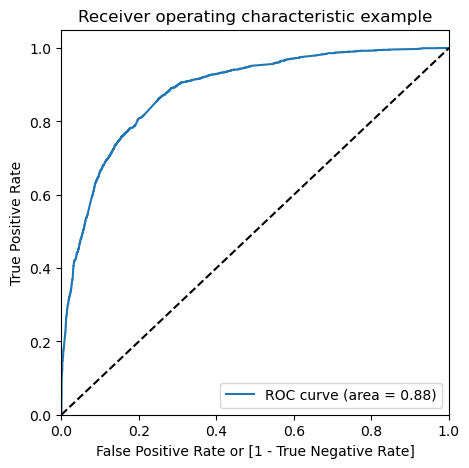

In [68]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [69]:
# Creating columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]


for i in numbers:

    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.647883,1,1,1,1,1,1,1,1,0,0,0
1,0,0.133180,0,1,1,0,0,0,0,0,0,0,0
2,0,0.232946,0,1,1,1,0,0,0,0,0,0,0
3,0,0.133180,0,1,1,0,0,0,0,0,0,0,0
4,0,0.495090,0,1,1,1,1,1,0,0,0,0,0


In [70]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])


# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity

from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:

    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    
    total1=sum(sum(cm1))
    
    
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

    
cutoff_df

,prob,accuracy,sensitivity,specificity
0.0,0.0,0.386711,1.000000,0.000000
0.1,0.1,0.577232,0.983306,0.321181
0.2,0.2,0.758306,0.912866,0.660847
0.3,0.3,0.788852,0.872557,0.736072
0.4,0.4,0.809321,0.765879,0.836714
0.5,0.5,0.810266,0.695847,0.882413
0.6,0.6,0.802708,0.627850,0.912965
0.7,0.7,0.773579,0.504072,0.943517
0.8,0.8,0.753582,0.413681,0.967908
0.9,0.9,0.706660,0.260179,0.988190


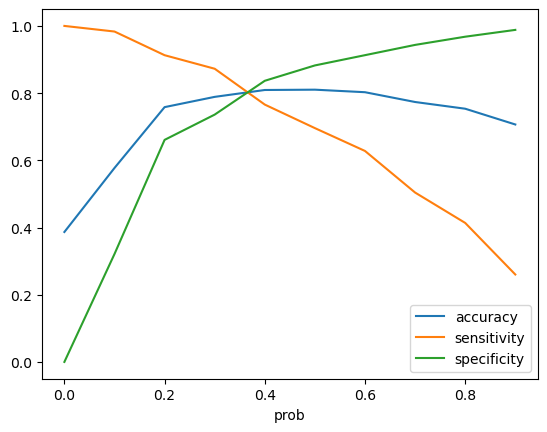

In [71]:
#Plotting the dataframe created

cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])

plt.show()

In [72]:
y_train_pred_final['final_prediction'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_prediction
0,1,0.647883,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.133180,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.232946,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.133180,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.495090,0,1,1,1,1,1,0,0,0,0,0,1


In [73]:
# Check the overall accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_prediction)

0.8031806014800819

In [74]:
# Creating confusion matrix 

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_prediction )

confusion2

array([[3127,  768],
       [ 482, 1974]])

In [75]:
# Substituting the value of true positive

TP = confusion2[1,1]


# Substituting the value of true negatives

TN = confusion2[0,0]


# Substituting the value of false positives

FP = confusion2[0,1] 


# Substituting the value of false negatives

FN = confusion2[1,0]

In [76]:
# Calculating the sensitivity

TP/(TP+FN)

0.8037459283387622

In [77]:
# Calculating the specificity

TN/(TN+FP)

0.8028241335044929

In [78]:
# Scaling numeric values

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [79]:
# Substituting all the columns in the final train model

col = X_train.columns

In [80]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]


# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

X_test_sm

X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_olark chat,Lead Source_welingak website,Do Not Email_yes,Last Activity_olark chat conversation,Last Activity_sms sent,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,Last Notable Activity_unreachable
8308,1.0,0.035461,0.416813,0,0,0,0,0,0,0,0,1,0,0
7212,1.0,0.028369,0.001320,0,0,0,0,0,1,0,0,0,1,0
2085,1.0,0.000000,0.000000,1,0,1,0,0,0,0,0,1,0,0
4048,1.0,0.028369,0.617077,0,0,0,0,0,1,0,0,1,0,0
4790,1.0,0.028369,0.005282,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,1.0,0.000000,0.000000,0,1,0,0,1,0,0,0,1,0,0
8179,1.0,0.170213,0.148768,0,0,0,0,0,1,0,0,0,0,0
6236,1.0,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0,0
5240,1.0,0.078014,0.458627,0,0,0,0,0,1,0,0,1,0,0


In [81]:
# Storing prediction of test set in the variable 'y_test_pred'

y_test_pred = res.predict(X_test_sm)


# Coverting it to df

y_pred_df = pd.DataFrame(y_test_pred)


# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)


# Remove index for both dataframes to append them side by side 

y_pred_df.reset_index(drop=True, inplace=True)

y_test_df.reset_index(drop=True, inplace=True)


# Append y_test_df and y_pred_df

y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)


# Renaming column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.456551
1,1,0.839834
2,1,0.982741
3,1,0.878240
4,0,0.108266


In [82]:
# Making prediction using cut off 0.35

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)

y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.456551,1
1,1,0.839834,1
2,1,0.982741,1
3,1,0.878240,1
4,0,0.108266,0
...,...,...,...
2718,1,0.108386,0
2719,0,0.364110,1
2720,0,0.133180,0
2721,1,0.820744,1


In [83]:
# Check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8079324274697025

In [84]:
# Creating confusion matrix 

confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )

confusion2

array([[1404,  340],
       [ 183,  796]])

In [85]:
# Substituting the value of true positive

TP = confusion2[1,1]


# Substituting the value of true negatives

TN = confusion2[0,0]


# Substituting the value of false positives

FP = confusion2[0,1] 


# Substituting the value of false negatives

FN = confusion2[1,0]

In [86]:
# Calculating the sensitivity

TP/(TP+FN)

0.8130745658835546

In [87]:
# Calculating the specificity

TN/(TN+FP)

0.805045871559633

In [88]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )

confusion

array([[3437,  458],
       [ 747, 1709]])

In [89]:
# Precision = TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7886479003230272

In [90]:
#Recall = TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6958469055374593

In [91]:
from sklearn.metrics import precision_recall_curve

In [92]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [93]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

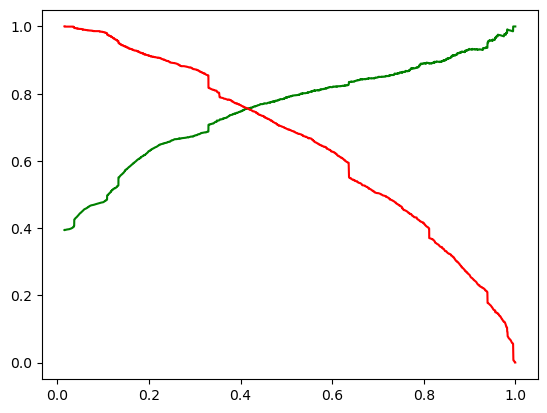

In [94]:
plt.plot(thresholds, p[:-1], "g-")

plt.plot(thresholds, r[:-1], "r-")

plt.show()

In [95]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_prediction,final_predicted
0,1,0.647883,1,1,1,1,1,1,1,1,0,0,0,1,1
1,0,0.133180,0,1,1,0,0,0,0,0,0,0,0,0,0
2,0,0.232946,0,1,1,1,0,0,0,0,0,0,0,0,0
3,0,0.133180,0,1,1,0,0,0,0,0,0,0,0,0,0
4,0,0.495090,0,1,1,1,1,1,0,0,0,0,0,1,1


In [96]:
# Accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8093213667139033

In [97]:
# Creating confusion matrix again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )

confusion2

array([[3259,  636],
       [ 575, 1881]])

In [98]:
# Substituting the value of true positive

TP = confusion2[1,1]


# Substituting the value of true negatives

TN = confusion2[0,0]


# Substituting the value of false positives

FP = confusion2[0,1] 


# Substituting the value of false negatives

FN = confusion2[1,0]

In [99]:
# Precision = TP / TP + FP

TP / (TP + FP)

0.7473182359952324

In [100]:
#Recall = TP / TP + FN

TP / (TP + FN)

0.7658794788273615

In [101]:
# Storing prediction of test set in the variable 'y_test_pred'

y_test_pred = res.predict(X_test_sm)


# Coverting it to df

y_pred_df = pd.DataFrame(y_test_pred)


# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)


# Remove index for both dataframes to append them side by side 

y_pred_df.reset_index(drop=True, inplace=True)

y_test_df.reset_index(drop=True, inplace=True)


# Append y_test_df and y_pred_df

y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)


# Renaming column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.456551
1,1,0.839834
2,1,0.982741
3,1,0.878240
4,0,0.108266


In [102]:
# Making prediction using cut off 0.41

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)

y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.456551,1
1,1,0.839834,1
2,1,0.982741,1
3,1,0.878240,1
4,0,0.108266,0
...,...,...,...
2718,1,0.108386,0
2719,0,0.364110,0
2720,0,0.133180,0
2721,1,0.820744,1


In [103]:
# Check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8152772677194271

In [104]:
# Creating confusion matrix 

confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )

confusion2

array([[1470,  274],
       [ 229,  750]])

In [105]:
# Substituting the value of true positive

TP = confusion2[1,1]


# Substituting the value of true negatives

TN = confusion2[0,0]


# Substituting the value of false positives

FP = confusion2[0,1] 


# Substituting the value of false negatives

FN = confusion2[1,0]

In [106]:
# Precision = TP / TP + FP

TP / (TP + FP)

0.732421875

In [107]:
#Recall = TP / TP + FN

TP / (TP + FN)

0.7660878447395302